# Data Description Notebook: Models 1 & 2

**Medicare DeSYNPuf Data: 
2009 Inpatient Claims for Risk Adjustment Modeling and Correspondence Analysis**

HDS 823 Final Project: Advanced Statistics in Healthcare
Kyle P. Rasku RN BSN

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# Load 2009 IP & ELIX Data, Created by the Cleaning Notebook
desynpuf = pd.read_csv("/home/kylier/python/DS/data/PUF/PUF_ELIX_IP2009.csv")

In [3]:
desynpuf.head()

,Unnamed: 0,DESYNPUF_ID,BENE_AGE,B_SEX,NH_WHITE,AA_BLACK,OTHER,NW_HISPANIC,B_DIVERSE,B_ALZHDMTA,...,AGE_GROUP,ANY_COSTS,PERCENT_COSTS,FIPS,STATE,COUNTY,HO_PROP_RANK,HO_QUARTILE,HF_PROP_RANK,HF_QUARTILE
0,0,0000438E79D01BEA,73.0,1,1,0,0,0,0.0,0,...,65-74,0.0,0.000000,12057.0,Florida,Hillsborough,0.597,2.0,0.537,2.0
1,1,00010E7BEA69142C,72.0,0,1,0,0,0,0.0,1,...,65-74,0.0,0.000000,10003.0,Delaware,New Castle,0.667,1.0,0.667,1.0
2,2,00015BF6509E1DF7,76.0,0,1,0,0,0,0.0,0,...,75-84,0.0,0.000000,37119.0,North Carolina,Mecklenburg,0.950,1.0,0.860,1.0
3,3,000240D599ED789C,67.0,0,0,1,0,0,1.0,1,...,65-74,1.0,0.004938,55035.0,Wisconsin,Eau Claire,0.819,1.0,0.944,1.0
4,4,0003E73AFBA840A8,68.0,0,1,0,0,0,0.0,0,...,65-74,0.0,0.000000,36055.0,New York,Monroe,0.500,2.0,0.726,2.0


In [4]:
desynpuf.drop(["Unnamed: 0"], axis=1, inplace=True, errors="ignore")
desynpuf.isnull().sum() 

DESYNPUF_ID            0
BENE_AGE               0
B_SEX                  0
NH_WHITE               0
AA_BLACK               0
OTHER                  0
NW_HISPANIC            0
B_DIVERSE              0
B_ALZHDMTA             0
B_CHF                  0
B_CNCR                 0
B_COPD                 0
B_DEPRESSN             0
B_DIABETES             0
B_ISCHMCHT             0
B_OSTEOPRS             0
B_CHRNKIDN             0
B_RA_OA                0
B_STRKETIA             0
B_ESRD                 0
B_DIED                 0
CVRG_MOS               0
RX_CVRG_MOS            0
MEAN_ELIX_SCORE        0
TOTAL_VISITS           0
TOTAL_CODES            0
MEAN_CODES_VISIT       0
MEAN_CHRONIC           0
ALLCOSTS               0
MEAN_COST_VISIT        0
TOTAL_LOS              0
MEAN_LOS               0
TOTAL_PHYS             0
MEAN_PHYS_VISIT        0
CBSA                   0
FULL_FIPS_CODE         0
FIPS_STATE_CODE        0
FIPS_COUNTY_CODE       0
TOTCHRONIC             0
AGE_GROUP              0


In [5]:
desynpuf.shape

(113305, 49)

In [6]:
desynpuf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113305 entries, 0 to 113304
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DESYNPUF_ID       113305 non-null  object 
 1   BENE_AGE          113305 non-null  float64
 2   B_SEX             113305 non-null  int64  
 3   NH_WHITE          113305 non-null  int64  
 4   AA_BLACK          113305 non-null  int64  
 5   OTHER             113305 non-null  int64  
 6   NW_HISPANIC       113305 non-null  int64  
 7   B_DIVERSE         113305 non-null  float64
 8   B_ALZHDMTA        113305 non-null  int64  
 9   B_CHF             113305 non-null  int64  
 10  B_CNCR            113305 non-null  int64  
 11  B_COPD            113305 non-null  int64  
 12  B_DEPRESSN        113305 non-null  int64  
 13  B_DIABETES        113305 non-null  int64  
 14  B_ISCHMCHT        113305 non-null  int64  
 15  B_OSTEOPRS        113305 non-null  int64  
 16  B_CHRNKIDN        11

## Demographic Distributions

Age, Age Group, Sex, Race & Ethnicity

## Age

This data is slightly more normally-distributed.  The mean age is 73, the median age is 74. IQR is 13, making anyone under 68 years old in the <25th percentile.  

Not surprising - these are Medicare beneficiaries.  Only those who are disabled are eligible at <65 years.

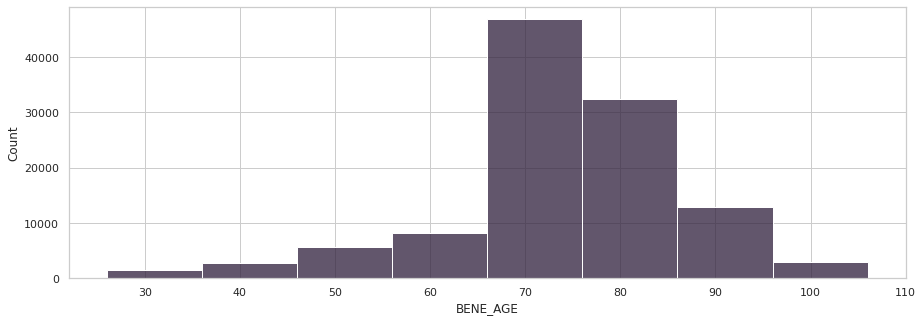

In [7]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="mako")
sb.histplot(x=round(desynpuf["BENE_AGE"]), binwidth=10)
plt.show()

In [8]:
desynpuf["BENE_AGE"].describe()

count    113305.000000
mean         73.132008
std          12.532698
min          25.500000
25%          68.000000
50%          74.000000
75%          81.000000
max         101.000000
Name: BENE_AGE, dtype: float64

## Age Groups

The Center for Medicare and Medicaid Services (CMS) defines five age categories in its' statistical analyses: 0-18, 19-44, 45-64, 65-84 and 85+.  Because the distribution of this data centers heavily on individuals between the ages of 65 and 85, I chose to separate the 65-84 group into two groups: 65-74 and 75-84.

38% of the beneficiaries in the sample are 65-74 years old

30% are 75-84 years old

and 17% are 85 or older

The remaining 13% are under 65 and there are no beneficiaries under 18.

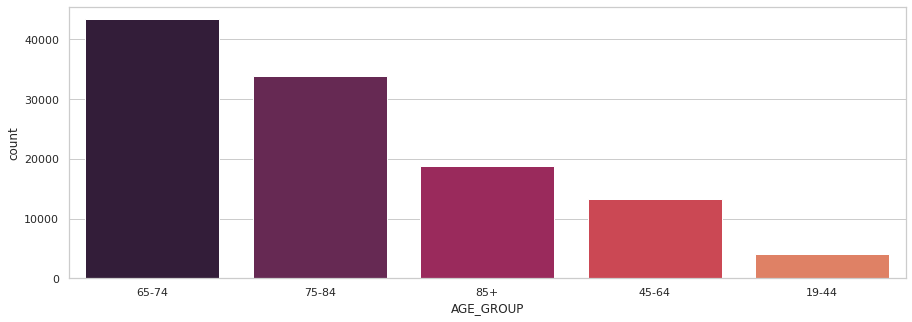

In [9]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="rocket")
sb.countplot(x=desynpuf["AGE_GROUP"])
plt.show()

In [10]:
desynpuf["AGE_GROUP"].value_counts(normalize=True)

65-74    0.382146
75-84    0.299263
85+      0.165906
45-64    0.117321
19-44    0.035365
Name: AGE_GROUP, dtype: float64

## Race & Ethnicity

For this data set, the beneficiary population is 84% white, 11% Black or African American, 2.3% Hispanic, and 4% Other.  

Asians / Pacific Islanders and American Indians / AK Natives are not represented.

This unfortunately illustrates the disparity between the demographic make up of Medicare users and the general population.  While only about 65-68% of the general population is "white", about 80% of the Medicare population is.  This owes to a variety of social and cultural disparities in the United States including but not limited to "white" people living longer than people of color, generally having better living conditions, generally having higher socio-economic status and utilizing benefits / governmental systems at higher rates.

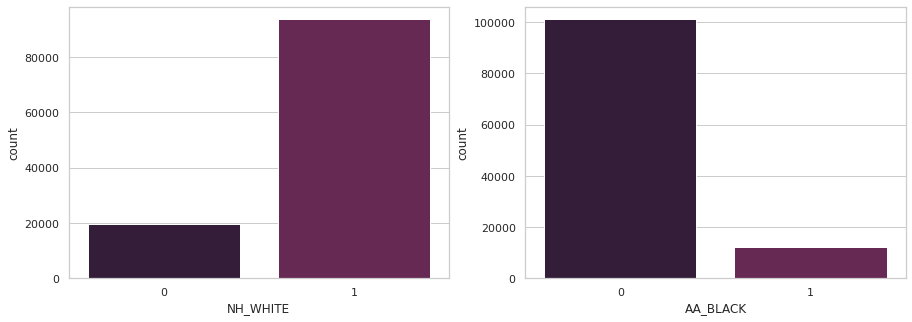

In [11]:
sb.set_theme(style="whitegrid", palette="rocket")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sb.countplot(x=desynpuf["NH_WHITE"], ax=axes[0])
sb.countplot(x=desynpuf["AA_BLACK"], ax=axes[1])
plt.show()

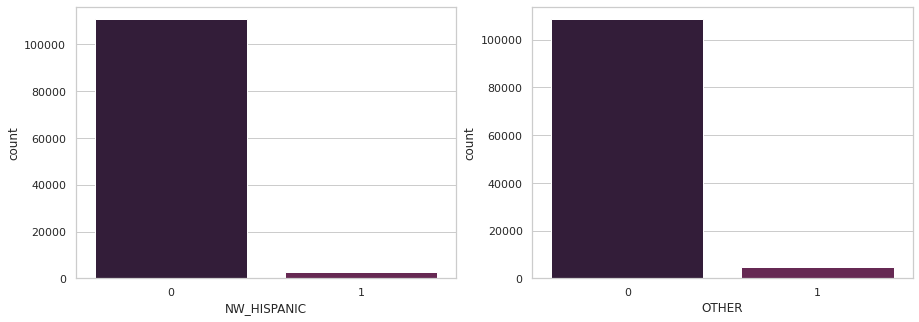

In [12]:
sb.set_theme(style="whitegrid", palette="rocket")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sb.countplot(x=desynpuf["NW_HISPANIC"], ax=axes[0])
sb.countplot(x=desynpuf["OTHER"], ax=axes[1])
plt.show()

For this data set, the beneficiary population is 84% white, 11% Black or African American, 2.3% Hispanic, and 4% Other.  

Asians / Pacific Islanders and American Indians / AK Natives are not represented.

This unfortunately represents the disparity between the demographic make up of Medicare users and the general population.  While only about 65% of the general population is "white", about 80% of the Medicare population is.  This owes to a variety of social and cultural disparities in the United States including but not limited to "white" people living longer than people of color, generally having better living conditions, generally having higher socio-economic status and utilizing benefits / governmental systems at higher rates.

In [13]:
desynpuf["NH_WHITE"].value_counts(normalize=True)

1    0.826671
0    0.173329
Name: NH_WHITE, dtype: float64

Of the people who did not identify as white (17.3% of beneficiaries), 

62.2% self-identified as Black

13.4% self-identified as non-white Hispanic

and 24.4% self-identified as "Another Race"

Recall: Asian / Pacific Islanders, and American Indian / AK Natives were not represented.

In [14]:
people_of_color = desynpuf[desynpuf["NH_WHITE"]==0]

people_of_color["AA_BLACK"].value_counts(normalize=True)

1    0.621875
0    0.378125
Name: AA_BLACK, dtype: float64

In [15]:
people_of_color["NW_HISPANIC"].value_counts(normalize=True)

0    0.865777
1    0.134223
Name: NW_HISPANIC, dtype: float64

In [16]:
people_of_color["OTHER"].value_counts(normalize=True)

0    0.756098
1    0.243902
Name: OTHER, dtype: float64

## Sex

1 MALE, 2 FEMALE recoded to 1 MALE, 0 FEMALE

There are about 10% more females than males.  This is likely explained by women's increased likelihood of living to an older age.

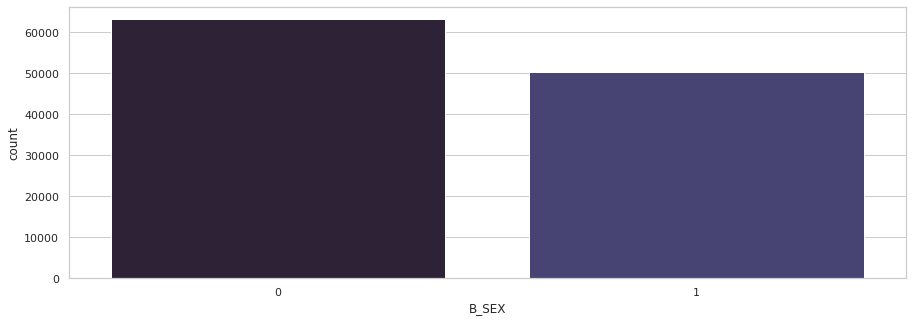

In [17]:
sb.set_theme(style="whitegrid", palette="mako")
sb.countplot(x=desynpuf["B_SEX"])
plt.show()

In [18]:
desynpuf["B_SEX"].value_counts(normalize=True)

0    0.556427
1    0.443573
Name: B_SEX, dtype: float64

## Deaths in 2009

1.5% of beneficiaries died in 2009.

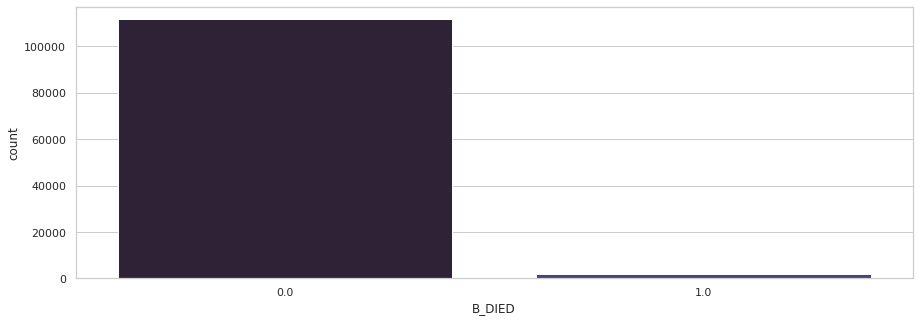

In [19]:
sb.set_theme(style="whitegrid", palette="mako")
sb.countplot(x=desynpuf["B_DIED"])
plt.show()

In [20]:
desynpuf["B_DIED"].value_counts(normalize=True)

0.0    0.984987
1.0    0.015013
Name: B_DIED, dtype: float64

## Chronic Conditions

Binary variables representing each of the CMS condition-groups. 

**0 = The patient does NOT have this condition,**

**1 = The patient DOES have this condition.**

Alzheimer's & Related B_ALZHDMTA 

Congestive Heart Failure B_CHF 

Cancer (Any type) B_CNCR

Depression B_DEPRESSN 

Diabetes Mellitus (Any type) B_DIABETES 

Ischemic Heart Disease B_ISCHMCHT 

Osteoporosis B_OSTEOPRS 

Chronic Obstructive Pulmonary Disease B_COPD 

Chronic Kidney Disease B_CHRNKIDN 

Rheumatoid or Osteoarthritis B_RA_OA 

Stroke or TIA B_STRKETIA 

End-Stage Renal Disease B_ESRD 

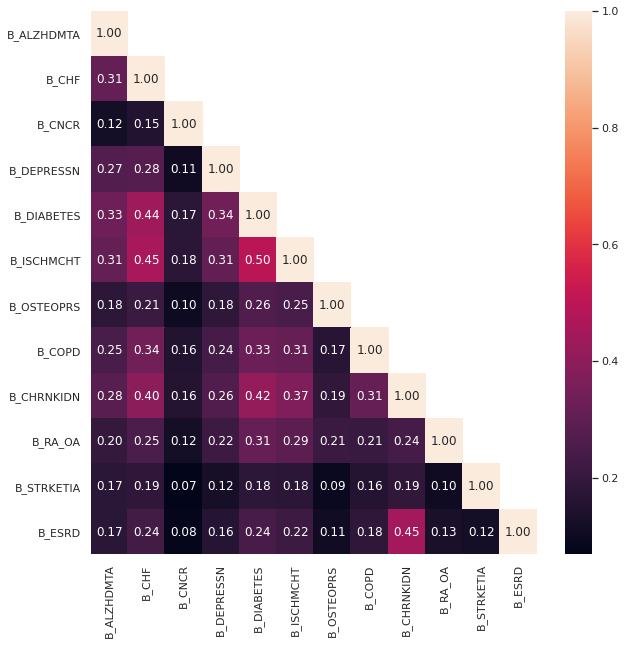

In [21]:
conditions = desynpuf[["B_ALZHDMTA", "B_CHF", "B_CNCR", "B_DEPRESSN", "B_DIABETES", "B_ISCHMCHT", 
                        "B_OSTEOPRS", "B_COPD", "B_CHRNKIDN", "B_RA_OA", "B_STRKETIA", "B_ESRD"]]
conditions_corr = conditions.corr(method="pearson")
lower_corr = conditions_corr.where(np.tril(np.ones(conditions_corr.shape)).astype(np.bool))

plt.rcParams["figure.figsize"] = (10.0, 10.0)
conditions_hmap=sb.heatmap(lower_corr, annot=True, cmap="rocket", fmt=".2f")
fig = conditions_hmap.get_figure()
fig.savefig("desynpuf_cc_heatmap.png")

Note the clinically understood correlations between diabetes, ischemic heart disease, CHF and CKD.

They are known to be causally connected on the basis of their pathophysiology.

Obviously, so are ESRD and CKD, which are two points on the same disease continuum.

There are also moderate correlations between depression, dementia, COPD and the DM/CHF/Heart Disease/CKD group.

Strangly, there appears to be a weaker correlation between stroke / TIA and these diseases.

While RA & OA produce similar disability in advanced stages, they have almost nothing in common in terms of pathophysiology or disease course.

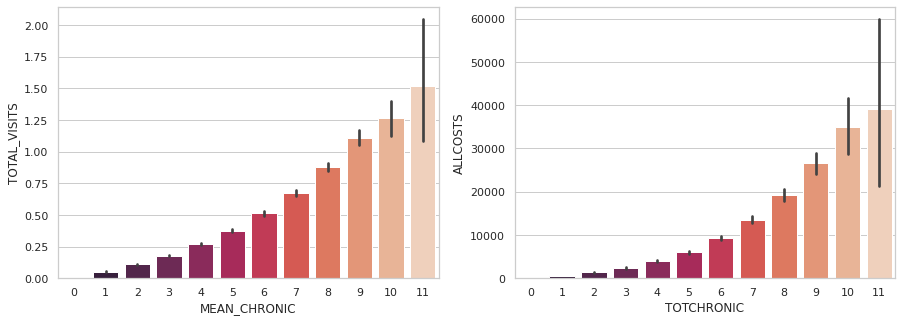

In [22]:
sb.set_theme(style="whitegrid", palette="rocket")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sb.barplot(x=desynpuf["MEAN_CHRONIC"], y=desynpuf["TOTAL_VISITS"], palette="rocket", ax=axes[0])
sb.barplot(x=desynpuf["TOTCHRONIC"], y=desynpuf["ALLCOSTS"], palette="rocket", ax=axes[1])
plt.show()

Above, the first graph shows mean chronic conditions vs. total visits with visits escalating gradually as the average number of chronic conditions grows.

The second graph shows total number of chronic conditions against costs.  Costs don't really begin to escalate until beneficiaries have 6 or more chronic conditions.

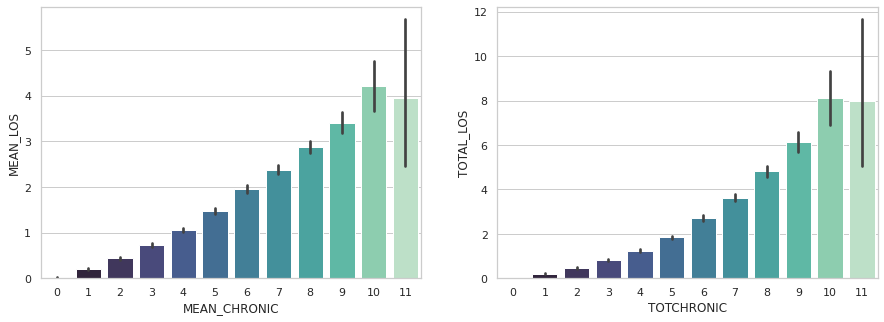

In [23]:
sb.set_theme(style="whitegrid", palette="rocket")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sb.barplot(x=desynpuf["MEAN_CHRONIC"], y=desynpuf["MEAN_LOS"], palette="mako", ax=axes[0])
sb.barplot(x=desynpuf["TOTCHRONIC"], y=desynpuf["TOTAL_LOS"], palette="mako", ax=axes[1])
plt.show()

## Exploring the relationship between illness and visits, lengths of stay

Very few people have a Mean Elixhauser Score greater than 10.

During outlier removal, we eliminated a few beneficiaries with mean scores > 13.

Total visits peaks between scores of 4 and 7, and total length of stay is normally distributed around 5.

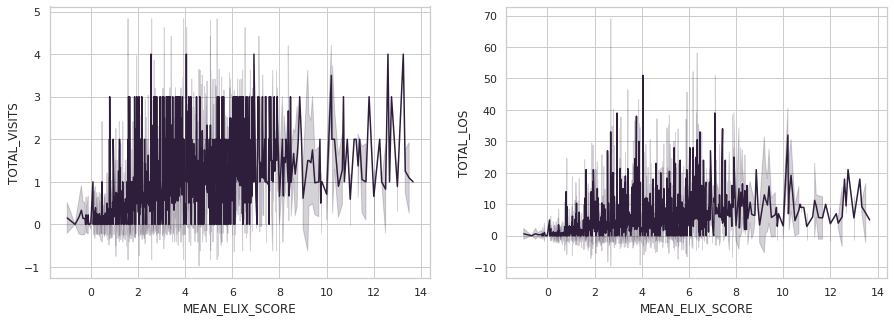

In [24]:
sb.set_theme(style="whitegrid", palette="mako")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sb.lineplot(x=desynpuf["MEAN_ELIX_SCORE"], y=desynpuf["TOTAL_VISITS"], ci="sd", ax=axes[0])
sb.lineplot(x=desynpuf["MEAN_ELIX_SCORE"], y=desynpuf["TOTAL_LOS"], ci="sd", ax=axes[1])
plt.show()

## Costs and visits, length of stay

Costs have been truncated at $400,000 per beneficiary

Total Visits > 7 per beneficiary have been removed (1 row)

Beneficiaries with aggregated Total Lengths of Stay for 2009 > 100 has been removed, also those with Mean Length of Stay > 29 days.

The lion's share of beneficiaries have no more than 3 visits for the year.

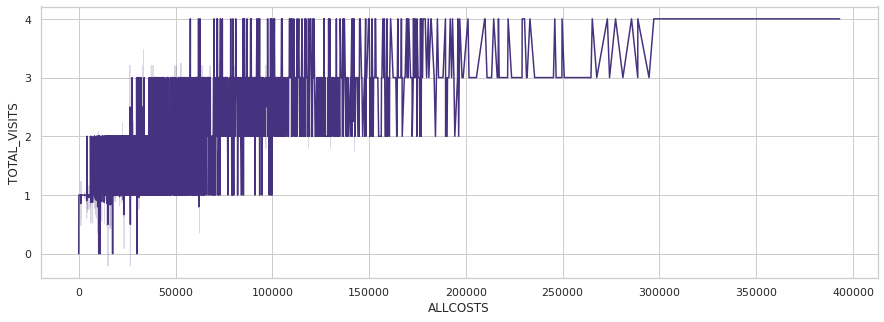

In [25]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="viridis")
sb.lineplot(x=desynpuf["ALLCOSTS"], y=desynpuf["TOTAL_VISITS"], ci="sd")
plt.show()

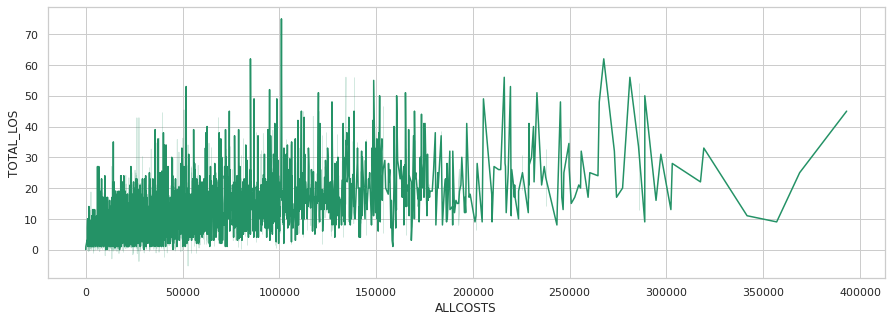

In [26]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="summer")
sb.lineplot(x=desynpuf["ALLCOSTS"], y=desynpuf["TOTAL_LOS"], ci="sd")
plt.show()

## Histograms - Costs, Visits & Length of Stay

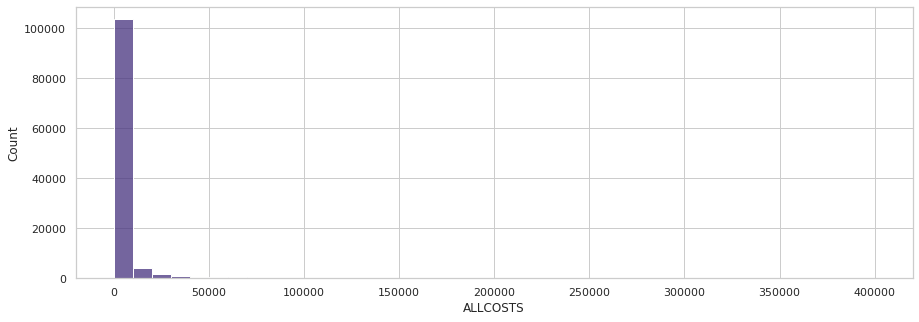

In [27]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="viridis")
sb.histplot(x=desynpuf["ALLCOSTS"], binwidth=10000)
plt.show()

In [28]:
desynpuf["ALLCOSTS"].describe()

count    113305.000000
mean       3553.922051
std       14985.805289
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      393088.000000
Name: ALLCOSTS, dtype: float64

### Costs > $0

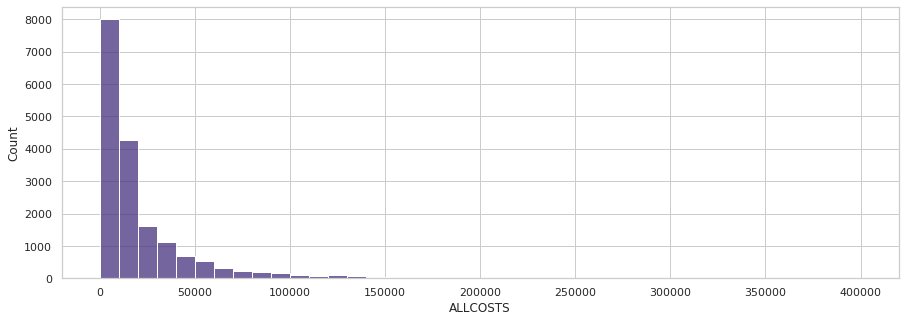

In [29]:
over_zero_costs = desynpuf[desynpuf["ALLCOSTS"]>0]

sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="viridis")
sb.histplot(x=over_zero_costs["ALLCOSTS"], binwidth=10000)
plt.show()

### Boxplot: Costs > $100,000


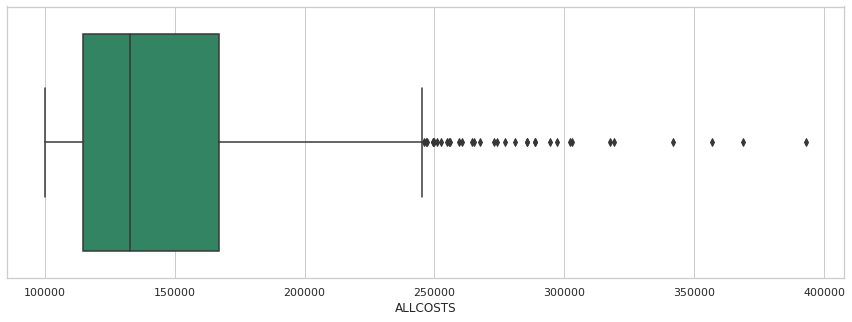

In [30]:
over_ht_costs = desynpuf[desynpuf["ALLCOSTS"]>100000]

sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="summer")
sb.boxplot(x=over_ht_costs["ALLCOSTS"])
plt.show()

### Total Visits

Mean Total Visits for Beneficiaries with Inpatient Claims in 2009: 3. 

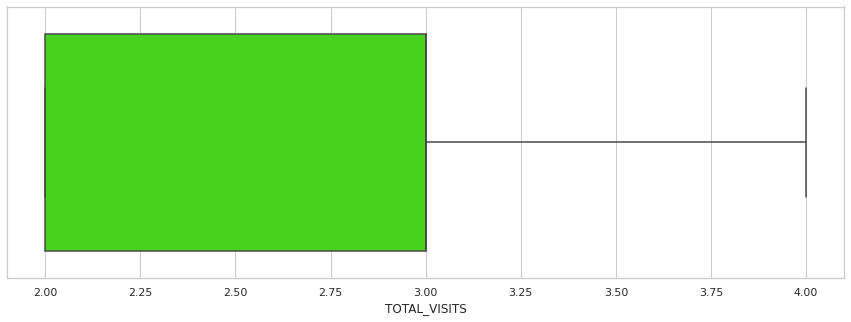

In [31]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="prism")
sb.boxplot(x=over_ht_costs["TOTAL_VISITS"])
plt.show()

### Total Length of Stay

Aggregated Total Length of all 2009 Stays for Each Beneficiary

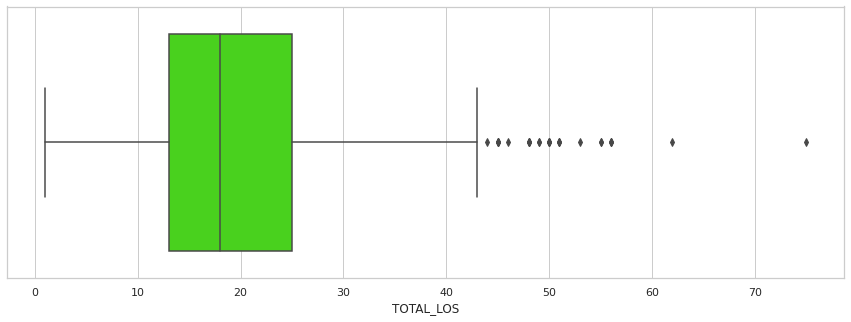

In [32]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="prism")
sb.boxplot(x=over_ht_costs["TOTAL_LOS"])
plt.show()

### Mean Length of Stay per hospitalization: 6 days

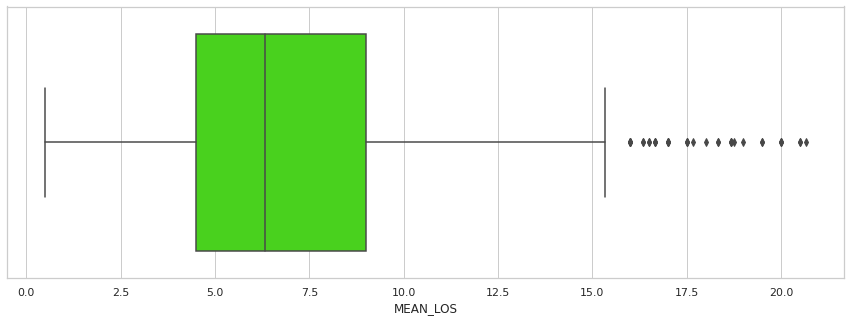

In [33]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="prism")
sb.boxplot(x=over_ht_costs["MEAN_LOS"])
plt.show()

## Codes & Physicians

ICD9 Codes and Numbers of Physicians for Inpatient Claims, 2009

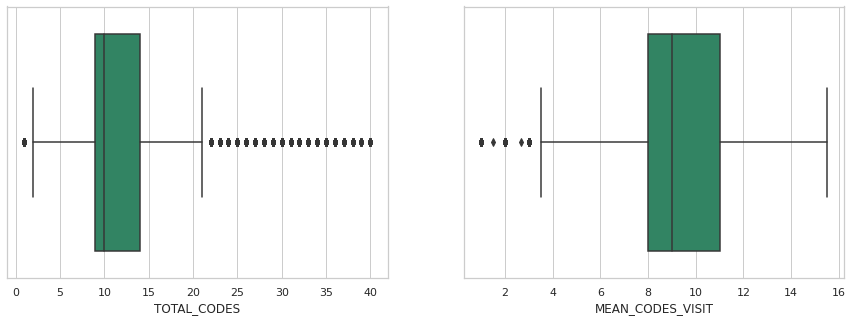

In [34]:
non_zero_codes = desynpuf[desynpuf["TOTAL_CODES"]>0]

sb.set_theme(style="whitegrid", palette="summer")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sb.boxplot(x=non_zero_codes["TOTAL_CODES"], ax=axes[0])
sb.boxplot(x=non_zero_codes["MEAN_CODES_VISIT"], ax=axes[1])
plt.show()

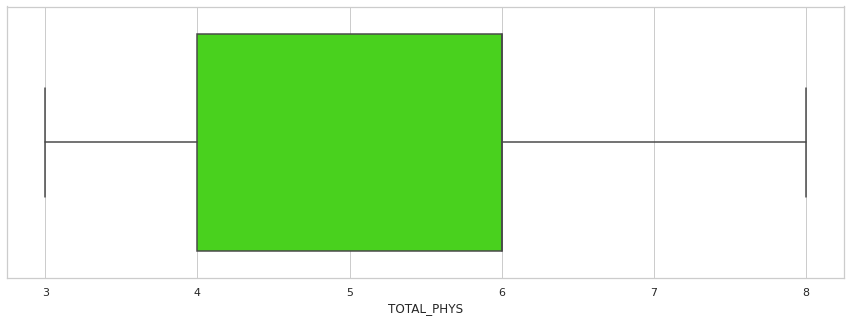

In [35]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid", palette="prism")
sb.boxplot(x=over_ht_costs["TOTAL_PHYS"])
plt.show()

## 2009 Prevalence

In 2009 (after outlier removal), 32.6% of the beneficiaries had none of the noted chronic conditions.

11% had 1, 

11% had 2, 

11% had 3, 

10% had 4, 

8.5% had 5, 

6.6% had 6,

4.8% had 7,

2.7% had 8,

and the remaining 1.5% had 9 or more.


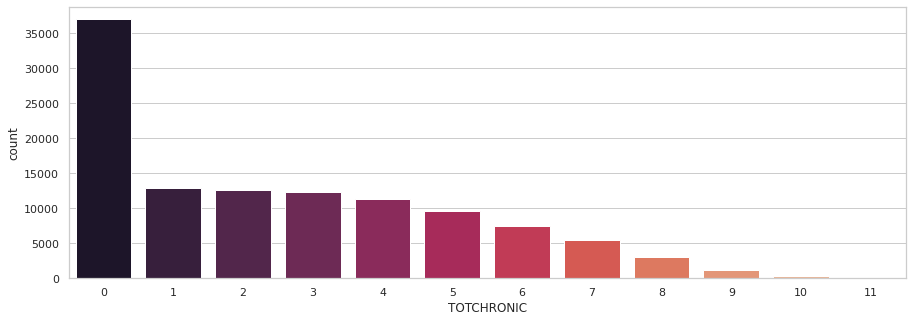

In [36]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid")
sb.countplot(x=desynpuf["TOTCHRONIC"], palette="rocket")
plt.show()

In [37]:
desynpuf["TOTCHRONIC"].value_counts(normalize=True)

0     0.326261
1     0.113481
2     0.111831
3     0.108927
4     0.100084
5     0.085398
6     0.066184
7     0.047694
8     0.026927
9     0.010582
10    0.002427
11    0.000203
Name: TOTCHRONIC, dtype: float64

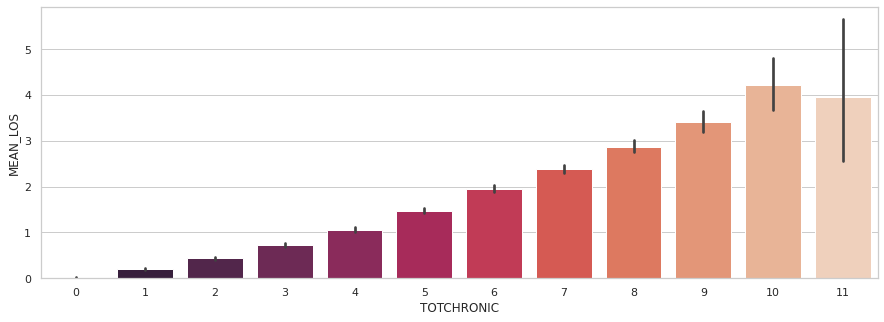

In [38]:
sb.set(rc={"figure.figsize":(15, 5)})
sb.set_theme(style="whitegrid")
sb.barplot(x=desynpuf["TOTCHRONIC"], y=desynpuf["MEAN_LOS"], palette="rocket")
plt.show()

Mean length of stay for those with 4 or fewer chronic conditions is 1 day.

5-6 chronic conditions, increases it to 2 days.

7-8, increases it to 3 days.

9 or more conditions, closing in on an average of 3-4.5 days.

In [39]:
desynpuf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113305 entries, 0 to 113304
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DESYNPUF_ID       113305 non-null  object 
 1   BENE_AGE          113305 non-null  float64
 2   B_SEX             113305 non-null  int64  
 3   NH_WHITE          113305 non-null  int64  
 4   AA_BLACK          113305 non-null  int64  
 5   OTHER             113305 non-null  int64  
 6   NW_HISPANIC       113305 non-null  int64  
 7   B_DIVERSE         113305 non-null  float64
 8   B_ALZHDMTA        113305 non-null  int64  
 9   B_CHF             113305 non-null  int64  
 10  B_CNCR            113305 non-null  int64  
 11  B_COPD            113305 non-null  int64  
 12  B_DEPRESSN        113305 non-null  int64  
 13  B_DIABETES        113305 non-null  int64  
 14  B_ISCHMCHT        113305 non-null  int64  
 15  B_OSTEOPRS        113305 non-null  int64  
 16  B_CHRNKIDN        11

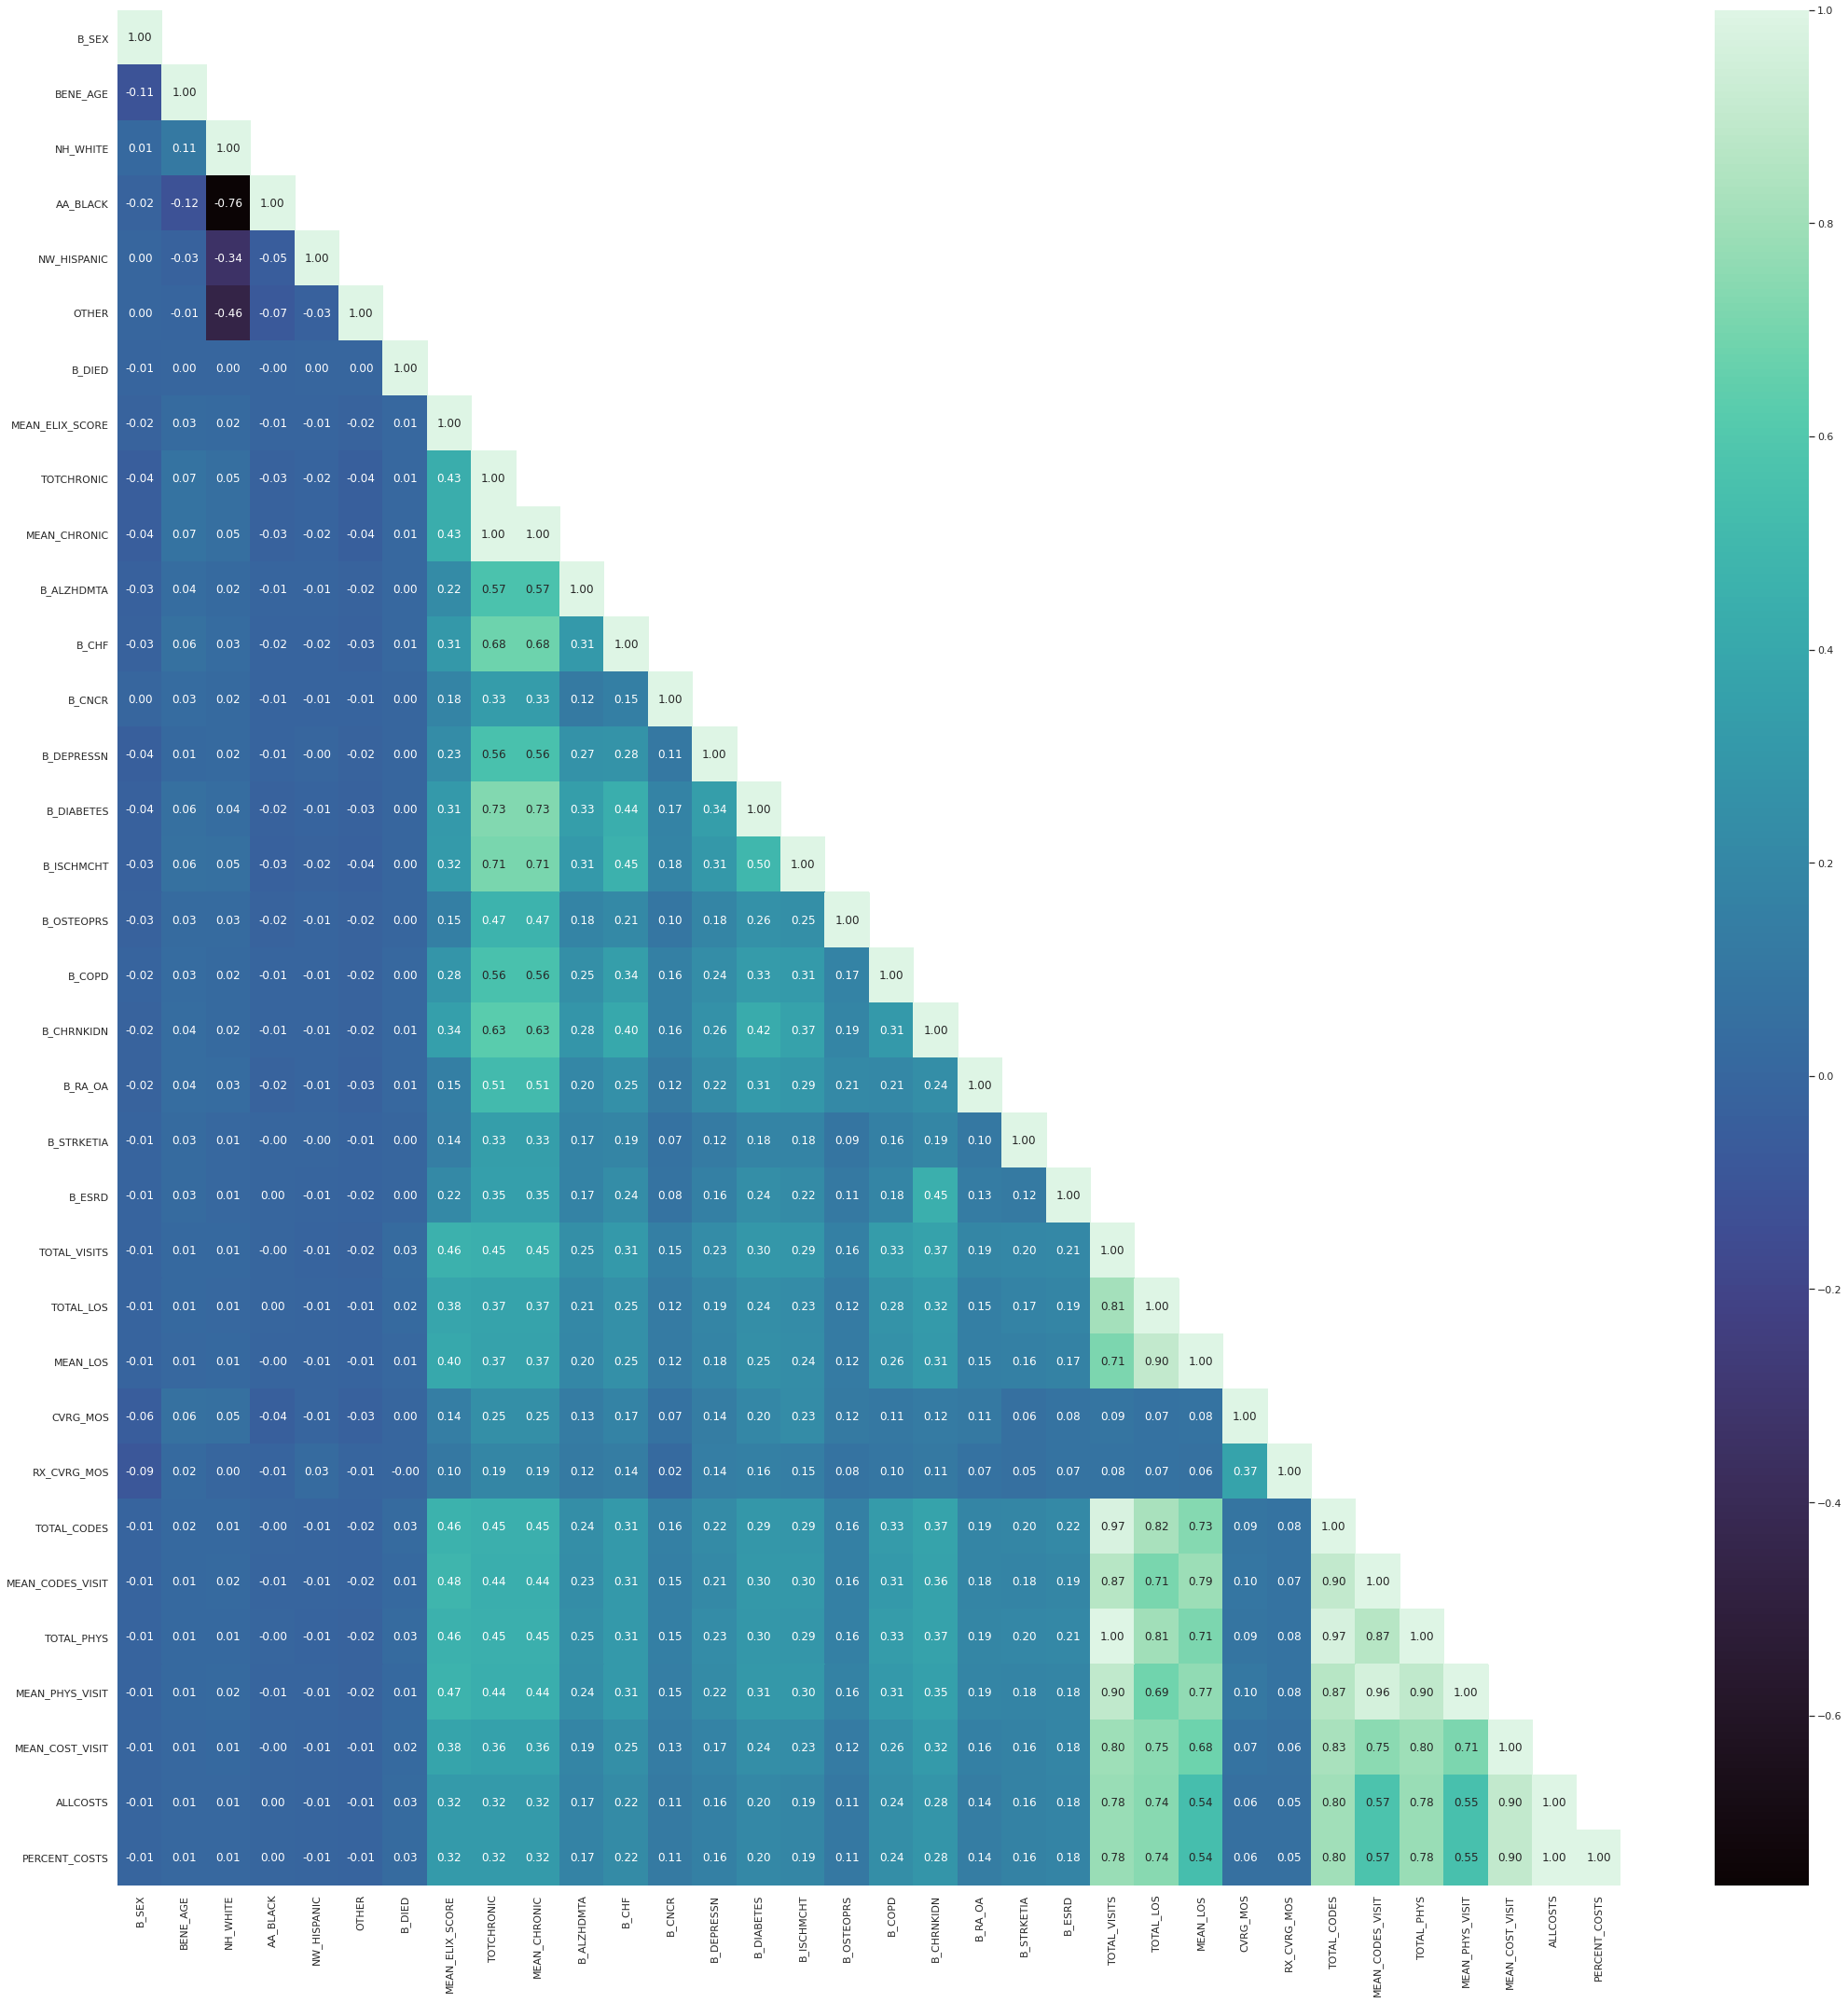

In [40]:
d_subset = desynpuf[["B_SEX", "BENE_AGE", "NH_WHITE", "AA_BLACK", "NW_HISPANIC", "OTHER", "B_DIED", 
                    "MEAN_ELIX_SCORE", "TOTCHRONIC", "MEAN_CHRONIC",  
                    "B_ALZHDMTA", "B_CHF", "B_CNCR", "B_DEPRESSN", "B_DIABETES", "B_ISCHMCHT", 
                    "B_OSTEOPRS", "B_COPD", "B_CHRNKIDN", "B_RA_OA", "B_STRKETIA", "B_ESRD",
                    "TOTAL_VISITS", "TOTAL_LOS", "MEAN_LOS", "CVRG_MOS", 
                     "RX_CVRG_MOS", "TOTAL_CODES", "MEAN_CODES_VISIT", "TOTAL_PHYS", "MEAN_PHYS_VISIT",
                    "MEAN_COST_VISIT", "ALLCOSTS", "PERCENT_COSTS"]]

subset_corr = d_subset.corr(method="pearson")
lower_corr = subset_corr.where(np.tril(np.ones(subset_corr.shape)).astype(np.bool))

plt.rcParams["figure.figsize"] = (30.0, 30.0)
subset_hmap=sb.heatmap(lower_corr, annot=True, cmap="mako", fmt=".2f")
fig = subset_hmap.get_figure()
fig.tight_layout()
fig.savefig("desynpuf_subset_heatmap.png")